Resumo dos Dados:
Total de jogos: 8405

Estatísticas básicas dos placares:
       mandante_Placar  visitante_Placar
count      8405.000000       8405.000000
mean          1.541225          1.027008
std           1.230607          1.027170
min           0.000000          0.000000
25%           1.000000          0.000000
50%           1.000000          1.000000
75%           2.000000          2.000000
max           7.000000          7.000000


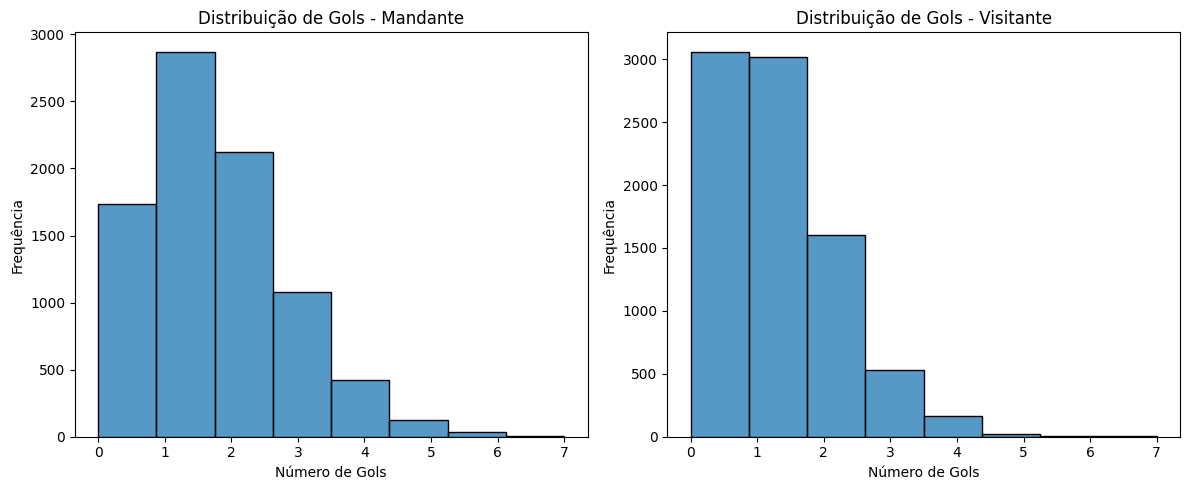

<Figure size 1200x600 with 0 Axes>

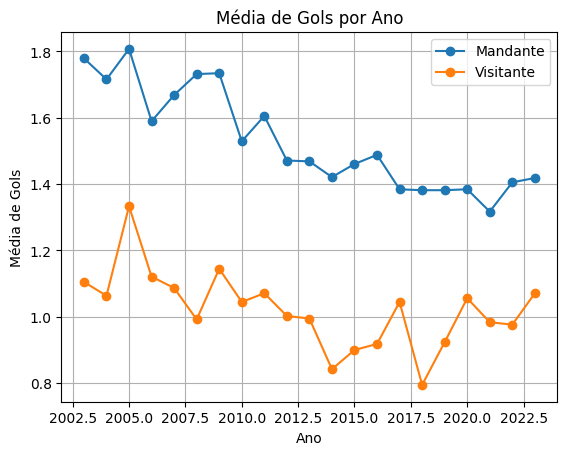

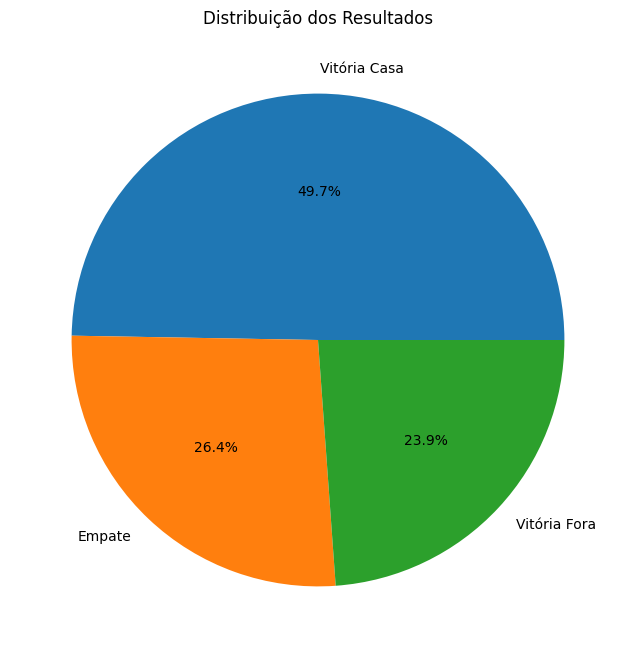


Estatísticas Gerais do Campeonato:
                        Métrica  Valor
         Média de Gols por Jogo   2.57
Porcentagem de Vitórias em Casa  49.72
         Porcentagem de Empates  26.42
   Porcentagem de Vitórias Fora  23.85
             Jogos sem Gols (%)   7.98

Desempenho por Estado (Como Mandante):
                 Média de Gols  Total de Jogos
mandante_Estado                               
PA                        1.97              67
MG                        1.65             875
RS                        1.63             902
SP                        1.62            2097
RJ                        1.55            1480
PR                        1.53             809
GO                        1.49             428
BA                        1.45             411
PE                        1.38             342
CE                        1.35             291
SC                        1.31             587
DF                        1.24              21
MT                        1.02  

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregamento e Preparação dos Dados
url = "https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-full.csv"
df = pd.read_csv(url)

# Convertendo data para datetime
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

# 2. Análise Exploratória
print("Resumo dos Dados:")
print("Total de jogos:", len(df))
print("\nEstatísticas básicas dos placares:")
print(df[['mandante_Placar', 'visitante_Placar']].describe())

# 3. Visualizações Principais

# 3.1 Distribuição de Gols
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['mandante_Placar'], bins=8)
plt.title('Distribuição de Gols - Mandante')
plt.xlabel('Número de Gols')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df['visitante_Placar'], bins=8)
plt.title('Distribuição de Gols - Visitante')
plt.xlabel('Número de Gols')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# 3.2 Gols por Temporada
gols_por_ano = df.groupby(df['data'].dt.year)[['mandante_Placar', 'visitante_Placar']].mean()
plt.figure(figsize=(12, 6))
gols_por_ano.plot(marker='o')
plt.title('Média de Gols por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Gols')
plt.grid(True)
plt.legend(['Mandante', 'Visitante'])
plt.show()

# 3.3 Resultados das Partidas
df['resultado'] = np.where(df['mandante_Placar'] > df['visitante_Placar'], 'Vitória Casa',
                          np.where(df['mandante_Placar'] < df['visitante_Placar'], 'Vitória Fora', 'Empate'))

plt.figure(figsize=(8, 8))
resultado_counts = df['resultado'].value_counts()
plt.pie(resultado_counts.values, labels=resultado_counts.index, autopct='%1.1f%%')
plt.title('Distribuição dos Resultados')
plt.show()

# 4. Análise Estatística
estatisticas = pd.DataFrame({
    'Métrica': [
        'Média de Gols por Jogo',
        'Porcentagem de Vitórias em Casa',
        'Porcentagem de Empates',
        'Porcentagem de Vitórias Fora',
        'Jogos sem Gols (%)'
    ],
    'Valor': [
        round((df['mandante_Placar'] + df['visitante_Placar']).mean(), 2),
        round((df['resultado'] == 'Vitória Casa').mean() * 100, 2),
        round((df['resultado'] == 'Empate').mean() * 100, 2),
        round((df['resultado'] == 'Vitória Fora').mean() * 100, 2),
        round((df['mandante_Placar'] + df['visitante_Placar'] == 0).mean() * 100, 2)
    ]
})

print("\nEstatísticas Gerais do Campeonato:")
print(estatisticas.to_string(index=False))

# 5. Desempenho por Estado
desempenho_estado = df.groupby('mandante_Estado')['mandante_Placar'].agg([
    ('Média de Gols', 'mean'),
    ('Total de Jogos', 'count')
]).sort_values('Média de Gols', ascending=False)

print("\nDesempenho por Estado (Como Mandante):")
print(desempenho_estado.round(2))